# Машинное обучение, ФКН ВШЭ

## Практическое домашнее задание 2. Градиентный спуск своими руками

### Общая информация

Дата выдачи: 30.09.2025

Мягкий дедлайн: 14.10.2025 23:59

Жесткий дедлайн: 18.10.2025 23:59


### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных модификаций градиентного спуска. В файле `descents.py` вам нужно будет реализовать несколько классов для различных вариаций градиентного спуска, а именно:
* `VanillaGradientDescent`
* `StochasticGradientDescent`
* `StochasticAverageGradient`
* `MomentumDescent`
* `Adam`

В файле `linear_regression.py` вам необходимо будет реализовать класс `LinearRegression` для обучения линейной регрессии (и, разумеется, предсказания целевой переменной на основе обученной модели).

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 11 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате **homework-practice-02-gd-Username.ipynb**, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 9.5

## Задание 1. Реализация градиентного спуска (4 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Напоминание про градиентный спуск

Основное свойство антиградиента &ndash; он указывает в сторону *наискорейшего* убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь $\eta_{k}$ обозначает длину шага на $k$-ой итерации (learning rate), а $Q(w)$ - функцию потерь (loss function).

### Градиент функции потерь MSE

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2025-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается как:

$$
    Q(w) = \frac{1}{\ell} \sum \limits_{i = 1}^\ell (y_i - \langle x_i, w \rangle)^2 = \frac{1}{\ell} \| X w - y \|^2
$$

где $\ell$ – количество объектов в выборке, $X \in \mathbb{R}^{\ell \times d}$ – матрица "объект-признак", а $y \in \mathbb{R}^\ell$ – целевая переменная. Через $x_i$ обозначается $i$-ая строчка матрицы $X$, отвечающая за $i$-й объект выборки.

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

**Решение:**

$$
    \nabla Q(w) = \frac{1}{\ell} 2X^T(Xw - y)
$$

### Задание 1.1. Learning Rate Schedules (0.03 балла)

Обратите внимание на **абстрактный** класс `LearningRateSchedule` в файле `descents.py`. С помощью него мы на каждой итерации градиентного спуска будем получать соответствующий `learning_rate` $\eta_k$.

В файле уже реализован класс `ConstantLR`, который на каждой итерации возвращает один и тот же заранее заданный шаг. Ваша задача в этом пункте – реализовать `TimeDecayLR`, который мы будем использовать для обучения линейной регрессии. Формула очередного шага должна выглядеть следующим образом:
$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

**Обратите внимание**

Все реализуемые вами классы спуска в задании - это *универсальные* оптимизаторы. Они не должны считать градиенты конкретной функции потерь внутри себя.

Для вычисления градиента они всегда обращаются к модели, с которой работают:

```
gradient = self.model.compute_gradients(X_batch, y_batch)
```

Чтобы это работало, уже на данном этапе должны быть реализованы в `linear_regression.py`:

* `compute_gradients(X, y)` для MSE (в дальнейшем, в Задании 7, сюда добавляется член L2-регуляризации),
* `compute_loss(X, y)` для MSE (аналогично с учётом L2 при необходимости).

Если идёте строго по порядку, реализуйте эти MSE-версии в начале Задания 2.1 (используя формулы из п. 1.0), а затем вернитесь к заданиям 1.2–1.6 - код оптимизаторов менять не придётся. В Задании 8 вы просто расширите обе функции под `LogCosh` и `Huber`, переключая их через `self.loss_function`.

Такой подход позволяет свободно менять функцию потерь, не переписывая алгоритмы оптимизации.

### Задание-примечание 1.1. Родительский класс BaseDescent (0 баллов).

В файле `descents.py` приведен шаблон класса `BaseDescent` – родительского класса для модификаций градиентного спуска, от которого будут наследоваться другие классы (`VanillaGradientDescent`, `StochasticGradientDescent`, `MomentumDescent` и `Adam`). Более подробно про наследование классов в Python можно прочитать
* Наследование: https://docs.python.org/3/tutorial/classes.html#inheritance
* Абстрактные классы: https://docs.python.org/3/library/abc.html

В классе `BaseDescent` **все методы уже реализованы**. Цель этого задания – внимательно ознакомиться с тем, как устроен этот класс.

Обратите внимание на атрибут `self.iteration`, отвечающий за номер итерации алгоритма спуска. Как раз с помощью него (и `self.lr_schedule`) мы и будем получать `learning_rate` на соответствующей итерации алгоритма. Функция `update_weights` должна обновлять веса модели `self.model.w`, а также возвращать величину обновления $w_{k + 1} - w_k$

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Напомним, что шаг классического градиентного спуска выглядит следующим образом:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

**Важно**: Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса модели `model.w`.

### Напоминание про SGD (стохастических градиентный спуск)

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов, обычно называемое **батчом**.

Оценка $\frac{1}{|B|} \sum \limits_{i \in B} \nabla_w q_i(w_k)$ называется **стохастическим градиентом** функции потерь, а получившийся метод называют методом **стохастического градиентного спуска** или просто SGD.

### Задание 1.3. Стохастический градиентный спуск StochasticGradientDescent (0.7 баллов).

Реализуйте стохастический градиентный спуск, заполнив пропуски в классе `StochasticGradientDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться **гиперпараметром** метода и передаваться в конструктор класса `__init__(...)`. Семплировать индексы батча объектов $B$ можно с повторениями (через np.random.randint) - это допустимо и даёт несмещённую оценку градиента. По желанию можно без повторений (np.random.choice(..., replace=False) или через пермутацию по эпохам).

### Напоминание про метод инерции (или метод моментов)

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация (например, в случае **стохастического градиентного спуска**). Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Stochastic Average Gradient (0.45 балла)

Держим память последних индивидуальных градиентов $g_i$ по всем объектам и их среднее $\bar g = \frac{1}{\ell}\sum_i g_i$. На каждом шаге выбираем индекс(ы) $j$ (мини-батч), заново считаем $g_j^{new}(w_k)$, обновляем среднее:
$$
\bar g \leftarrow \bar g + \frac{1}{\ell}\bigl(g_j^{new} - g_j^{old}\bigr),\qquad
w_{k+1} = w_k - \eta_k, \bar g.
$$
Инициализация: $g_i=0 \Rightarrow \bar g=0$.

Так получаем шаг почти как у полного градиента, но считаем градиент лишь на одном (или нескольких) объекте за итерацию.

Реализуйте класс `SAG` в `descents.py` с хранением `grad_memory` и `avg_grad`. Подсказка: чтобы получить пер-объектный градиент, можно вызывать `compute_gradients` на срезе из одного объекта `X[j:j+1]`.


### Задание 1.5 Метод Momentum - MomentumDescent (0.8 баллов).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ являеться гиперпараметром метода, однако в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Напоминание про AdaGrad, RMSprop и Adam

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. Идея проста: мы будем "копить" сумму квадратов градиентов и делить очередной градиент на корень из этой суммы. Таким образом, обновление весов с большими градиентами будет тормозиться, а с маленькими наоборот получать большие шаги. Формула обновлени будет выглядить так:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафиксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций (метод инерции), а также делать адаптивную длину шага по каждому параметру (`RMSProp`). Таким образом, мы получим метод `Adam` с той лишь разницей, что в методе `Adam` дополнительно делается нормировка накопленных градиентов и квадратов градиентов для устранения смещения.

### Задание 1.6. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam, заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Линейная регресия (1 балл)

### Задание 2.1. Решение методом градиентного спуска (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegressionModel**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

### Задание 2.2. Аналитическое решение (0.5 балла)

Но, как мы помним из лекции, помимо решения при помощи градиентного спуска, для ряда функций потерь можно выписать в том числе аналитическое решение. Давайте сперва вспомним, как оно выглядит для MSE. Выведите оптимальную формулу для $w$, держа в памяти формулу MSE, и дополните класс `LinearRegression`

$$\text{MSE} = \| X w - y \|^2$$

Вывод:

$\text{MSE}(w) = (X w - y)^T (X w - y)= w^T X^T X w - w^T X^T y - y^T X w + y^T y$

Используем $w^T X^T y = y^T X w$. Дифференцируем каждое слагаемое по $w$

$\frac{\partial}{\partial w} [w^T X^T X w] = 2 X^T X w$

$\frac{\partial}{\partial w} [-2 w^T X^T y] = -2 X^T y$

$\frac{\partial}{\partial w} [y^T y] = 0$

$\nabla\text{MSE} = 2 X^T X w - 2 X^T y = 0$. Приравняли к нулю, так как нужен минимум функции потерь. Теперь решаем относительно $w$

**Итоговый ответ**

$${w} = (X^T X)^{-1} X^Ty$$

**Вопрос**: Как мы помним, у аналитического решения есть минусы, какие кстати?

**Ответ**: 
 * Трудоемкие вычисления обратной матрицы при большом количестве признаков 
 * Обращение может быть невозможно или будет неустойчивый результат из-за вырожденности или плохой обусловленности матрицы $X^T X$

Тут мы ничего специально проверять в контесте не будем

In [1]:
#Для отладки, чтобы не переоткрывать ноутбук при изменении в подгрузочных файлах. Дальше в Задании 2.2 ничего не меняла (код исходный)
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from linear_regression import LinearRegression
import pandas as pd

num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [3]:
from sklearn.metrics import mean_squared_error as mse
import sklearn

sklearn_linreg = sklearn.linear_model.LinearRegression(fit_intercept=False)
sklearn_linreg.fit(x, y)
print("Sklearn MSE", mse(sklearn_linreg.predict(x), y))

your_linreg = LinearRegression(optimizer=None)
your_linreg.fit(x, y)
print("Your MSE", mse(your_linreg.predict(x), y))

assert abs(mse(your_linreg.predict(x), y) - mse(sklearn_linreg.predict(x), y)) < 1e-12, "Не повезло, попробуйте еще раз"

Sklearn MSE 0.1004296676077709
Your MSE 0.10042966760777089


Давайте сделаем задание немного прикольнее и изменим одну из колонок. Как мы знаем, полная мультиколлинеарность запрещает нам пользоваться аналитическим решением, но `sklearn` по какой-то причине это обходит, хмм

In [4]:
x[:, 3] = x[:, 2] + x[:, 4]

In [5]:
sklearn_linreg = sklearn.linear_model.LinearRegression(fit_intercept=False)
sklearn_linreg.fit(x, y)
print("Sklearn MSE", mse(sklearn_linreg.predict(x), y))

your_linreg = LinearRegression(optimizer=None)
your_linreg.fit(x, y)

print("Your MSE", mse(your_linreg.predict(x), y))

Sklearn MSE 0.10881788570891031
Your MSE 0.11280993521690416


Ваша задача - понять, как можно сделать так, чтобы аналитическое решение работало всегда, вне зависимости от матрицы X. Как оказывается, это можно сделать, если воспользоваться SVD разложением, в нашем случае усеченным, чтобы было проще (это не то же самое, что обычный SVD, у него другие размерности матриц, смотрите ниже). Воспользуйтесь `scipy.sparse.linalg.svds` с числом компонент 4

Выведите формулу для w и снова дополните класс `LinearRegression`

$$\text{X} = \underset{n\times m}{\mathrm{U}} \ \underset{m\times m}{\mathrm{\Sigma}} \ \underset{m\times k}{\mathrm{V^T}}$$

Вывод:

$y = Xw$ -- линейная модель

Подставляем SVD-разложение
$$y = U\Sigma V^T w$$

Умножаем слева на $U^T$
$$U^T y = U^T U\Sigma V^T w$$

$$U^T y = \Sigma V^T w$$

Умножаем слева на $\Sigma^{-1} $

$$V^T w = \Sigma^{-1} U^T y$$

$$V V^T w = V \Sigma^{-1} U^T y$$

$$w = V \Sigma^{-1} U^T y$$

**Ответ**
$$ w = V{\underset{m\times m}{\mathrm{\Sigma}}}^{-1}{\mathrm{U^T}} y $$

In [6]:
sklearn_linreg = sklearn.linear_model.LinearRegression(fit_intercept=False)
sklearn_linreg.fit(x, y)
print("Sklearn MSE", mse(sklearn_linreg.predict(x), y))

your_linreg = LinearRegression(optimizer="SVD")
your_linreg.fit(x, y)
print("Your MSE", mse(your_linreg.predict(x), y))

assert abs(mse(your_linreg.predict(x), y) - mse(sklearn_linreg.predict(x), y)) < 1e-12, "Не повезло, попробуйте еще раз"

Sklearn MSE 0.10881788570891031
Your MSE 0.10881788570891027


## Задание 3. Проверка кода (0 баллов)

Данная секция нужна для того, чтобы убедиться в правильности реализации методов спуска и класса `LinearRegression`. В начале мы сделаем небольшую локальную проверку на "адекватность" и "запускаемость" ваших моделей, после чего уже можно будет делать посылки в Яндекс Контест.

In [7]:
%load_ext autoreload
#%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
#%autoreload 2

from descents import (
    VanillaGradientDescent,
    StochasticGradientDescent,
    SAGDescent,
    MomentumDescent,
    Adam
)

In [9]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

Проверяем код на запускаемость.

In [10]:
# Если вы реализовали не все методы спуска, то уберите лишние из списка ниже
descent_models = [
    VanillaGradientDescent,
    StochasticGradientDescent,
    SAGDescent,
    MomentumDescent,
    Adam
]

max_iter = 10
tolerance = 0
num_objects = 100
dimension = 5

for descent_model in descent_models:
    optimizer = descent_model()
    model = LinearRegression(
        optimizer=optimizer,
        tolerance=tolerance,
        max_iter=max_iter,
    )
    model.fit(x, y)
    assert len(model.loss_history) == max_iter + 1, "Loss history failed"
    y_pred = model.predict(x)
    assert y_pred.shape == y.shape, "Prediction shape does not match target variable"

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://new.contest.yandex.ru/contests/82854/start).

Для каждой задачи из контеста вставьте ID успешной посылки и ваш ник (почту):

* **Ник/почта**:
evlytkina@edu.hse.ru

* **VanillaGradientDescent**:
https://new.contest.yandex.ru/contests/82854/problem?id=9236982%2F2025_10_10%2FmQZqTbOY85&tab=submissions&submissionId=10000068-fb99-bfa5-9967-3eeea5821ec4

* **StochasticDescent**:
https://new.contest.yandex.ru/contests/82854/problem?id=9236982%2F2025_10_12%2F5uRhSAMSnW&tab=submissions&submissionId=10000068-fb9a-243d-4e9d-86fc0e5aba66

* **SAGDescent**:
https://new.contest.yandex.ru/contests/82854/problem?id=9236982%2F2025_10_12%2FzVG9mQzDO4&tab=submissions&submissionId=10000068-fb9a-776e-b46b-537ddc682a0c

* **MomentumDescent**:
https://new.contest.yandex.ru/contests/82854/problem?id=9236982%2F2025_10_12%2FNFCAaeBVfC&tab=submissions&submissionId=10000068-fb9a-8099-8649-52f365abc6e9

* **Adam**:
https://new.contest.yandex.ru/contests/82854/problem?id=9236982%2F2025_10_12%2FB1lQ7NjGgz&tab=submissions&submissionId=10000068-fb9a-879e-e1c9-735278be51ea


* **LinearRegression**:
https://new.contest.yandex.ru/contests/82854/problem?id=9236982%2F2025_10_12%2F6PSKLrmgx8&tab=submissions&submissionId=10000068-fb9a-928b-d6c3-4029ad81f93c

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [11]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import (
    ConstantLR, TimeDecayLR,
    VanillaGradientDescent, StochasticGradientDescent,
    MomentumDescent, Adam, SAGDescent
)
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [12]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [13]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

Разделите признаки на категориальные, числовые и ... все остальное

In [14]:
#Смотрим, какие есть типы
print(data.dtypes)

brand                object
model                object
vehicleType          object
gearbox              object
fuelType             object
notRepairedDamage    object
powerPS               int64
kilometer             int64
autoAgeMonths         int64
price                 int64
dtype: object


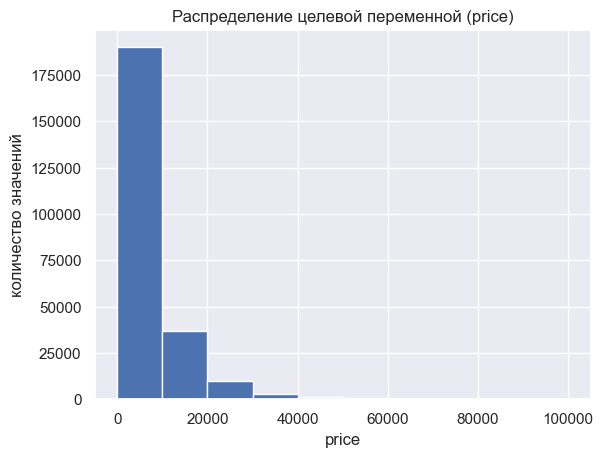

In [15]:
#Гистограмма целевой переменной. Распределение не похоже на нормальное, надо заменить логарифмом
plt.xlabel('price')
plt.ylabel('количество значений')
plt.title('Распределение целевой переменной (price)')
plt.hist(data['price'])
plt.savefig('график1.pdf', format='pdf')
plt.show()

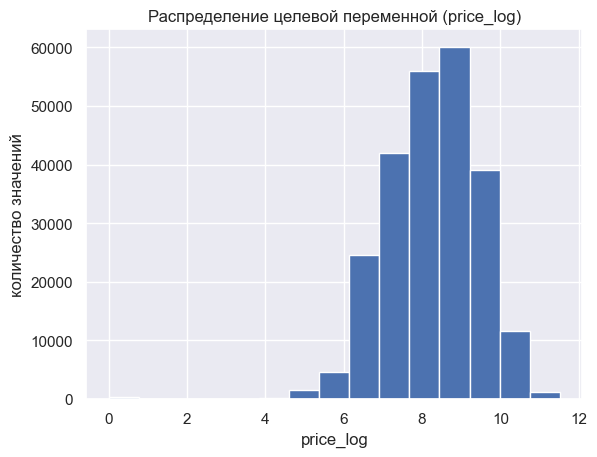

In [16]:
#Смотрим, как выглядит распределение логарифма целевой переменной (есть выбросы, надо их убрать)
plt.xlabel('price_log')
plt.ylabel('количество значений')
plt.title('Распределение целевой переменной (price_log)')
plt.hist(np.log(data['price']), bins=15)
plt.savefig('график2.pdf', format='pdf')
plt.show()

In [17]:
#Делаем колонку с логом целевой переменной
data['price_log'] = np.log(data['price'])

In [18]:
#Отсекаем выборы в логе таргета
data = data[data['price_log'] >= 4]

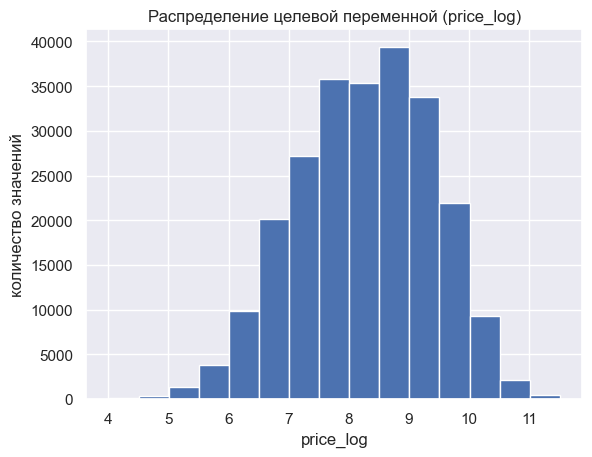

In [19]:
#Смотрим итог преобразований
plt.xlabel('price_log')
plt.ylabel('количество значений')
plt.title('Распределение целевой переменной (price_log)')
plt.hist(data['price_log'], bins=15)
plt.savefig('график3.pdf', format='pdf')
plt.show()

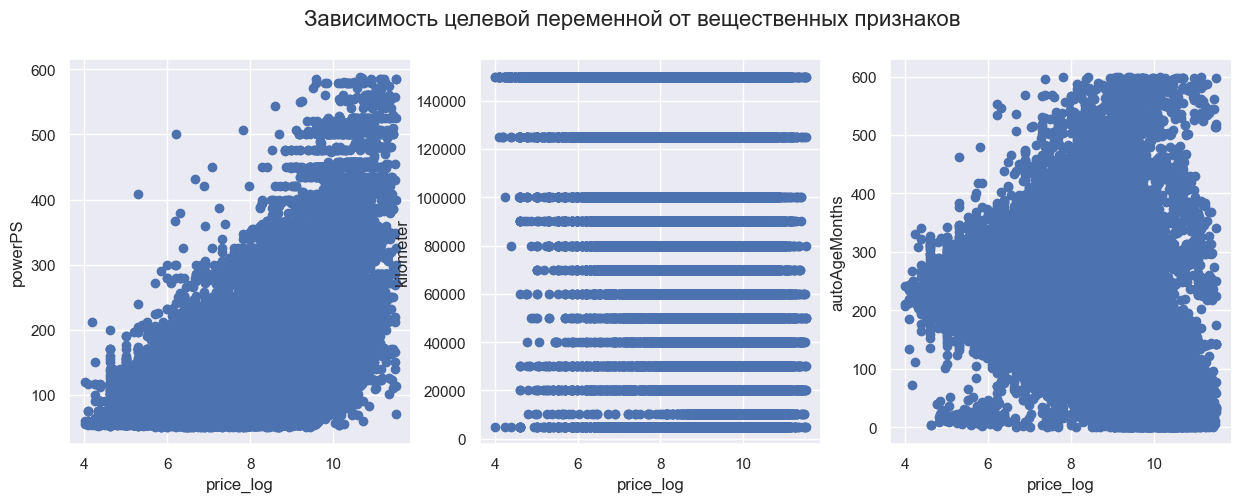

In [20]:
import matplotlib.pyplot as plt
#Для вещественных переменных строим график зависимости переменной от таргета
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
#Первый признак
axes[0].scatter(data['price_log'], data['powerPS'])
axes[0].set_xlabel('price_log')
axes[0].set_ylabel('powerPS')
#Второй признак
axes[1].scatter(data['price_log'], data['kilometer'])
axes[1].set_xlabel('price_log')
axes[1].set_ylabel('kilometer')
#Третий признак
axes[2].scatter(data['price_log'], data['autoAgeMonths'])
axes[2].set_xlabel('price_log')
axes[2].set_ylabel('autoAgeMonths')

fig.suptitle('Зависимость целевой переменной от вещественных признаков', fontsize=16)
plt.savefig('графики4.pdf', format='pdf')
plt.show()

In [21]:
import seaborn as sns

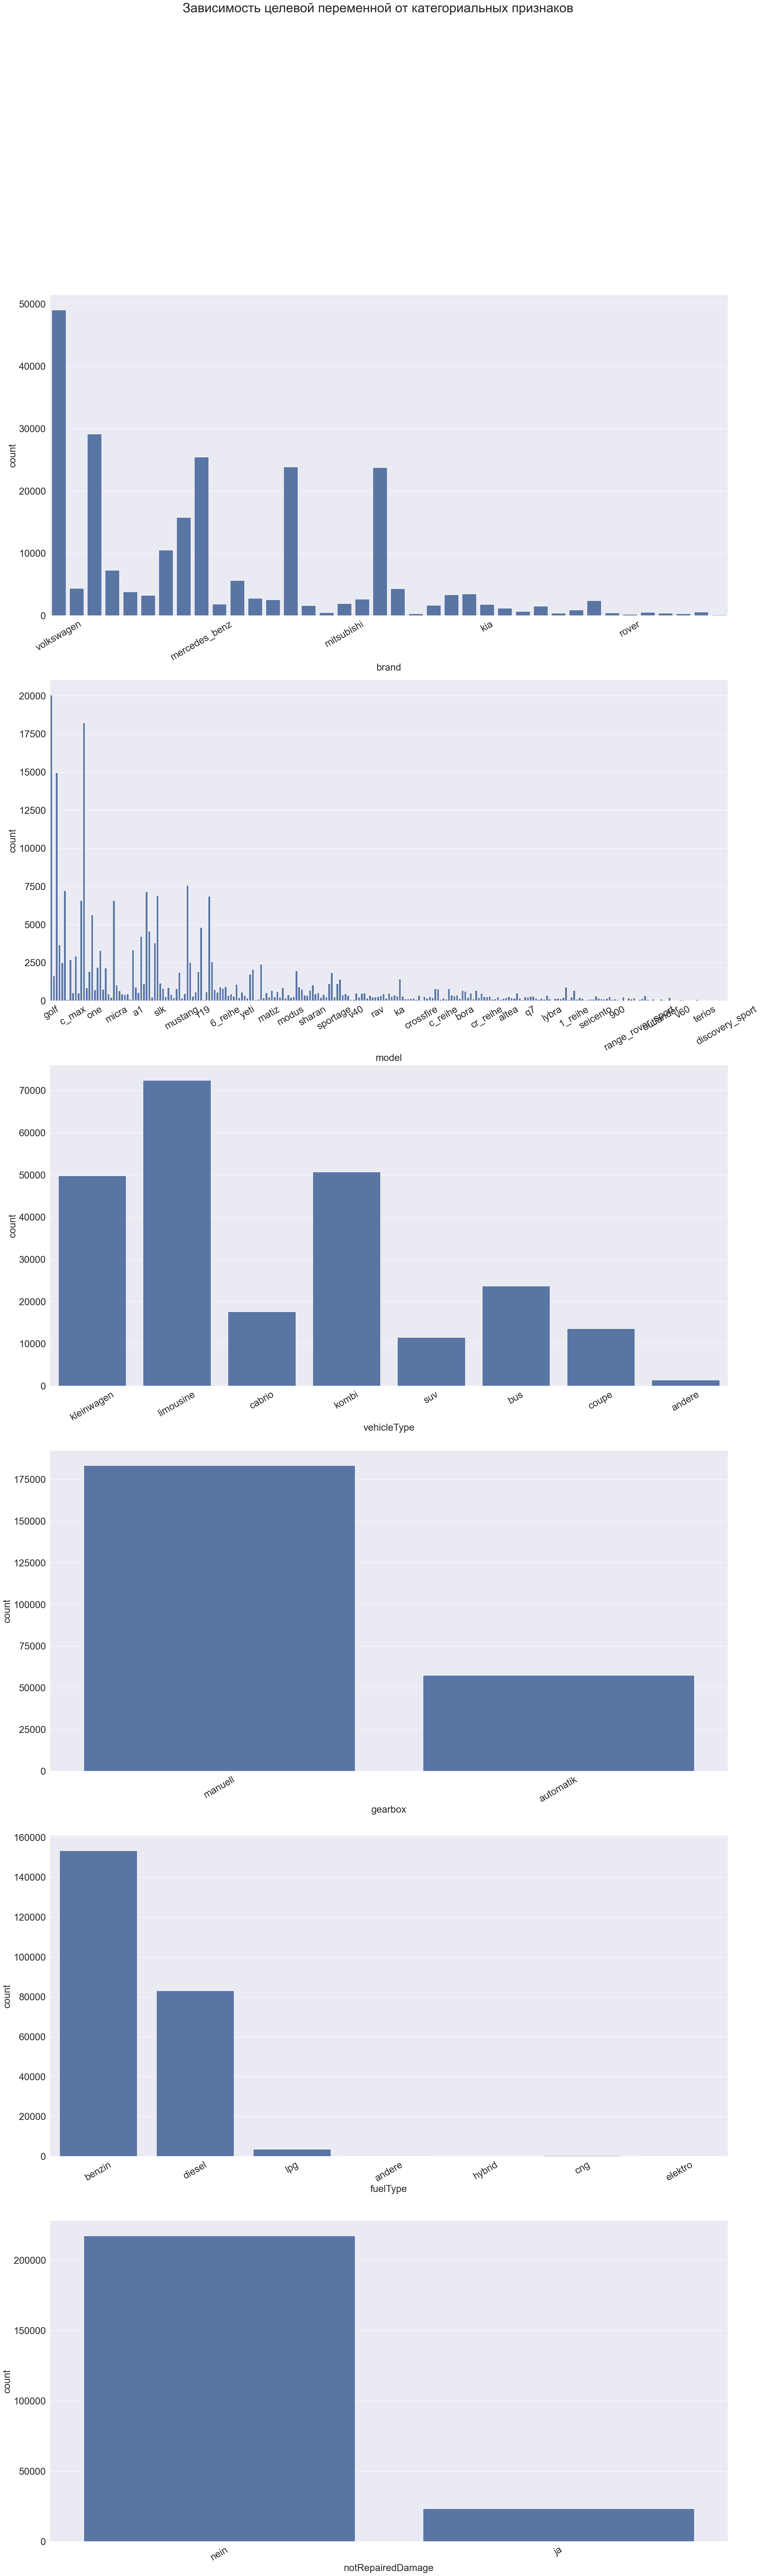

In [22]:
#Смотрим распределение категориальных признаков
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(30, 100))
sns.countplot(data=data, x='brand', ax=axes[0])
sns.countplot(data=data, x='model', ax=axes[1])
sns.countplot(data=data, x='vehicleType', ax=axes[2])
sns.countplot(data=data, x='gearbox', ax=axes[3])
sns.countplot(data=data, x='fuelType', ax=axes[4])
sns.countplot(data=data, x='notRepairedDamage', ax=axes[5])
fig.suptitle('Зависимость целевой переменной от категориальных признаков', fontsize=32)
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=30, labelsize=24)
    ax.set_xlabel(ax.get_xlabel(), fontsize=24)
    ax.set_ylabel(ax.get_ylabel(), fontsize=24)
    ax.tick_params(axis='both', which='major', labelsize=24)
    # Показывать каждое 5-е значение на оси X (исправленная версия)
    ticks = ax.get_xticks()
    labels = [label.get_text() for label in ax.get_xticklabels()]
    
    if len(ticks) > 10:  # Если много меток, показываем каждую 5-ю
        # Выбираем каждую 5-ю позицию и соответствующую метку
        new_ticks = ticks[::8]
        new_labels = labels[::8]
        
        ax.set_xticks(new_ticks)
        ax.set_xticklabels(new_labels)
    
plt.savefig('графики5.pdf', format='pdf')
plt.show()

* Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков;

Признаки 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', 'autoAgeMonths', 'powerPS', 'kilometer' могут быть полезны. 'brand', 'model' имеют очень много различных категорий и принимают каждое значение своей категории в среднем не более 10000 раз, что является слишком маленьким значением для выборки. Похэтому их можно не учитывать.
* Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;

Уместно из 'kilometer' сделать категориальный признак, также вещественные признаки надо привести к нормальному распределению, стандартизовать и удалить выбросы. А категориальные надо закодировать.

In [23]:
#Выбираем нужные признаки
data = data.loc[~data['fuelType'].isin(['lpg', 'andere', 'hybric', 'cng', 'elektro'])]
data = data.loc[data['vehicleType'] != 'andere']

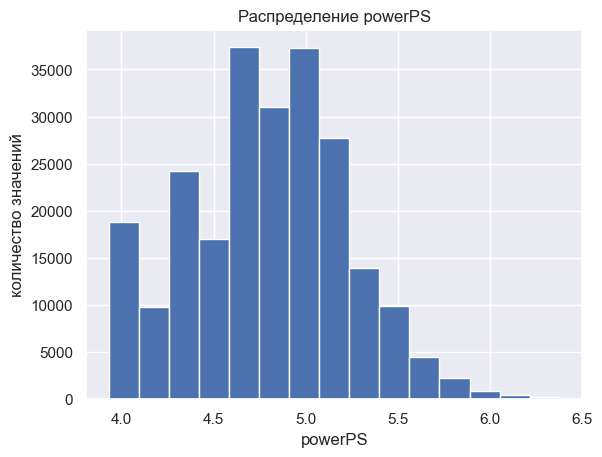

In [24]:
#Смотрим гистограммы вещественных признаков
#Распределение 'powerPS' не похоже на нормальное, придется брать лог
plt.hist(np.log(data['powerPS']), bins=15)
plt.xlabel('powerPS')
plt.ylabel('количество значений')
plt.title('Распределение powerPS')
plt.savefig('графики6.pdf', format='pdf')
plt.show()

In [25]:
#Берем лог от признака
data['powerPS_log'] = np.log(data['powerPS'])

In [26]:
#Отсекаем выборосы
data = data[data['powerPS_log'] <= 5.75]

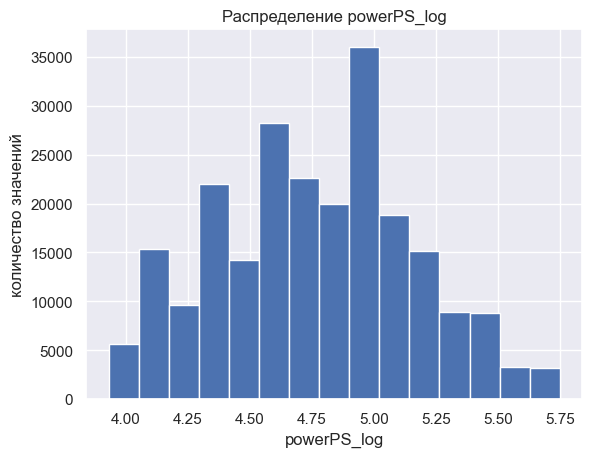

In [27]:
#Рисуем итог
plt.hist(data['powerPS_log'], bins=15)
plt.xlabel('powerPS_log')
plt.ylabel('количество значений')
plt.title('Распределение powerPS_log')
plt.savefig('графики7.pdf', format='pdf')
plt.show()

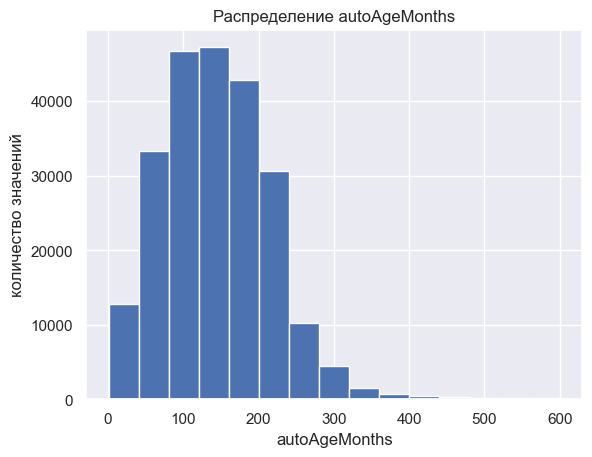

In [28]:
#Смотрим распределение еще одного вещественного признака (похоже на нормальное, но с выбросами)
plt.hist(data['autoAgeMonths'], bins=15)
plt.xlabel('autoAgeMonths')
plt.ylabel('количество значений')
plt.title('Распределение autoAgeMonths')
plt.savefig('графики8.pdf', format='pdf')
plt.show()

In [29]:
#Убираем выбросы
data = data[data['autoAgeMonths'] <= 300]

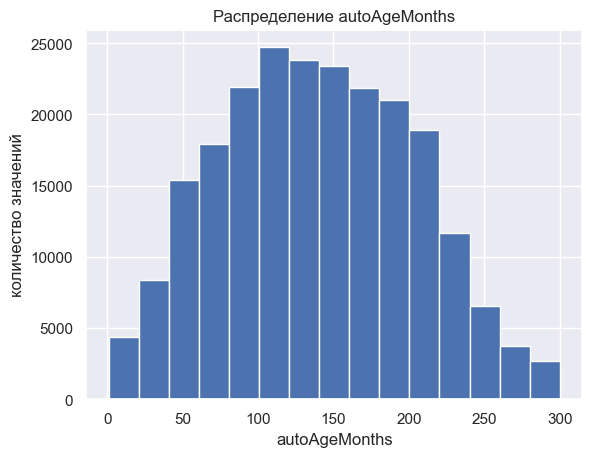

In [30]:
#Смотрим итог
plt.hist(data['autoAgeMonths'], bins=15)
plt.xlabel('autoAgeMonths')
plt.ylabel('количество значений')
plt.title('Распределение autoAgeMonths')
plt.savefig('графики8.pdf', format='pdf')
plt.show()

In [31]:
#Делим признаки на категориальные и вещественные
categorical = []
numeric = []
other = []
numeric = data.loc[:, ~data.columns.isin(['price', 'price_log', 'kilometer', 'powerPS'])].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = data.loc[:, ~data.columns.isin(['brand', 'model'])].select_dtypes(include='object').columns.tolist()
categorical.append('kilometer')

Добавляем в данные единичную колонку `bias`, чтобы не делать отдельные параметр $b$ для свободного члена модели.

In [32]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price_log']

А также сделаем базовую обработку данных, а именно:
* Применим `OneHotEncoding` к категориальным признакам
* Стандартизуем численные признаки с помощью `StandardScaler`
* Остальные признаки трогать не будем, т.к. с ними непонятно что делать

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

Теперь вам необходимо разбить данные на обучающую, тестовую и валидационную выборки:

In [34]:
# YOUR CODE (data split into train/val/test)
from sklearn.model_selection import train_test_split

In [35]:
#Сначала делим на тренировочную и оставшуюся, потом делим до конца
X_train, X_test_val, y_train, y_test_val = train_test_split(x, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

## Задание 5. Сравнение методов градиентного спуска (1.5 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (0.75 балла)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [36]:
from functools import partial

In [37]:
from sklearn.metrics import r2_score

In [38]:
# YOUR CODE
# Ищем оптимальную лямбда
descent_models = [
    VanillaGradientDescent,
    StochasticGradientDescent,
    SAGDescent,
    MomentumDescent,
    Adam
]

#Диапазон проверяемых значений лямбда
lambda_mas = np.logspace(-3, 0, 4)
#Словари для записей лямбда (ключи - модели)
#Количество итераций до сходимости
count_iter = {}
#MSE на тренировочной выборке
mse_train = {}
#MSE на валидационной выборке
mse_val = {}
#R2 на тренировочной выборке
r2_train = {}
#R2 на валидационной выборке
r2_val = {}
for descent_model in descent_models:
    for lambda_ in lambda_mas:
        #Настройка модели
        lambda_class = partial(TimeDecayLR, lambda_=lambda_)
        model = LinearRegression(optimizer = descent_model(lambda_class))
        model.fit(X_train, y_train)
        #Заполняем словари значениями
        count_iter[descent_model] = count_iter.get(descent_model, [])
        count_iter[descent_model].append(model.optimizer.iteration)
        mse_train[descent_model] = mse_train.get(descent_model, [])
        mse_train[descent_model].append(mse(model.predict(X_train), y_train))
        mse_val[descent_model] = mse_val.get(descent_model, [])
        mse_val[descent_model].append(mse(model.predict(X_val), y_val))
        r2_val[descent_model] = r2_val.get(descent_model, [])
        r2_val[descent_model].append(r2_score(model.predict(X_val), y_val))
        r2_train[descent_model] = r2_train.get(descent_model, [])
        r2_train[descent_model].append(r2_score(model.predict(X_train), y_train))

In [39]:
import pandas as pd
import numpy as np

# Создаем DataFrame для count_iter
count_iter_df = pd.DataFrame(count_iter)
count_iter_df.index = [f"{lambda_mas[i]}" for i in range(len(lambda_mas))]
count_iter_df.columns = [key for key in count_iter.keys()]
# Создаем DataFrame для R2 и MSE
def create_metric_df(metric_dict):
    df = pd.DataFrame(metric_dict)
    df.index = [f"{lambda_mas[i]}" for i in range(len(lambda_mas))]
    df.columns = [key for key in count_iter.keys()]
    df = df.round(4)
    return df

mse_train_df = create_metric_df(mse_train)
mse_val_df = create_metric_df(mse_val)
r2_train_df = create_metric_df(r2_train)
r2_val_df = create_metric_df(r2_val)

In [40]:
count_iter_df

,<class 'descents.VanillaGradientDescent'>,<class 'descents.StochasticGradientDescent'>,<class 'descents.SAGDescent'>,<class 'descents.MomentumDescent'>,<class 'descents.Adam'>
0.001,521,383,1,432,29
0.01,462,162,1,444,1000
0.1,444,175,1,155,503
1.0,170,1000,1,273,105


In [41]:
mse_train_df

,<class 'descents.VanillaGradientDescent'>,<class 'descents.StochasticGradientDescent'>,<class 'descents.SAGDescent'>,<class 'descents.MomentumDescent'>,<class 'descents.Adam'>
0.001,38.0389,4.177310e+01,69.4002,1.3479,68.5280
0.01,1.3724,3.683900e+00,69.4002,0.3416,24.3061
0.1,0.3445,7.835000e-01,69.3998,0.2371,0.2425
1.0,0.2373,2.141376e+12,69.3983,0.2342,0.2339


In [42]:
mse_val_df

,<class 'descents.VanillaGradientDescent'>,<class 'descents.StochasticGradientDescent'>,<class 'descents.SAGDescent'>,<class 'descents.MomentumDescent'>,<class 'descents.Adam'>
0.001,38.0316,4.175890e+01,69.4141,1.3434,68.5396
0.01,1.3666,3.662100e+00,69.4141,0.3426,24.2438
0.1,0.3454,7.751000e-01,69.4137,0.2431,0.2480
1.0,0.2433,2.180995e+12,69.4123,0.2403,0.2398


In [43]:
r2_train_df

,<class 'descents.VanillaGradientDescent'>,<class 'descents.StochasticGradientDescent'>,<class 'descents.SAGDescent'>,<class 'descents.MomentumDescent'>,<class 'descents.Adam'>
0.001,-687.1592,-1006.9380,-3.295396e+15,-0.7466,-378580.0690
0.01,-0.7847,-5.0441,-5.174730e+13,0.6848,-44.8788
0.1,0.6828,0.3367,-1.444329e+11,0.7611,0.7469
1.0,0.7607,-0.0041,-1.263000e+10,0.7639,0.7637


In [44]:
r2_val_df

,<class 'descents.VanillaGradientDescent'>,<class 'descents.StochasticGradientDescent'>,<class 'descents.SAGDescent'>,<class 'descents.MomentumDescent'>,<class 'descents.Adam'>
0.001,-695.5326,-1027.4842,-3.349203e+15,-0.7876,-379944.6020
0.01,-0.8253,-5.1488,-5.173493e+13,0.6790,-44.9248
0.1,0.6771,0.3292,-1.453672e+11,0.7542,0.7402
1.0,0.7537,-0.0041,-1.276434e+10,0.7571,0.7571


**Результаты**

Видно, что с ростом lambda у VanillaGradientDescent увеличивается качество и уменьшается ошибка. Лучший результат lambda = 1

У StochasticGradientDescent идет улучшение метрики качества и уменьшение ошибки до значения 0.1, затем все параметры резко ухудшаются. Лучший результат lambda = 0.1

У SAGDescent не удалось достичь сходимости, скорее всего из-за маленьких изменений весов на первой итерации действует критерий останова

У MomentumDescent идет увеличение R2 и уменьшение ошибки при увеличении лямбда. После 0.1 значительного улучшение не происходит. Лушие результаты 0.1 и 1.

У Adam идет увеличение R2 и уменьшение ошибки при увеличении лямбда. Лушее значение 1.

### Задание 5.2. Сравнение методов (0.75 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

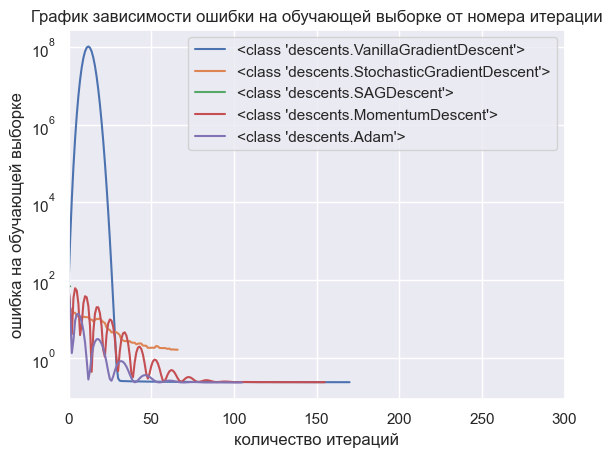

In [45]:
plt.figure()

descent_models = [
    VanillaGradientDescent,
    StochasticGradientDescent,
    SAGDescent,
    MomentumDescent,
    Adam
]

lambda_opt = [1, 0.1, 0.1, 0.1, 1]
i = 0
#Создаем графики для каждой модели с оптимальными лямбда
for descent_model in descent_models:
    lambda_class = partial(TimeDecayLR, lambda_=lambda_opt[i])
    model = LinearRegression(optimizer = descent_model(lambda_class))
    model.fit(X_train, y_train)
    loss_h = model.loss_history
    plt.plot(loss_h, label=descent_model)
    i += 1

plt.legend()
plt.xlim(0, 300)
plt.yscale('log')
plt.title('График зависимости ошибки на обучающей выборке от номера итерации')
plt.xlabel('количество итераций')
plt.ylabel('ошибка на обучающей выборке')
plt.savefig('графики8.pdf', format='pdf')

**Результаты**

VanillaGradientDescent имеет один пик по количеству итераций и имеет плавно убывающую ошибку. StochasticGradientDescent имеет на выходе наибольшую ошибку и сходится очень неравномерно (каждую итерацию видно). SAGDescent не сошелся, у него очень большая ошибка. MomentumDescent имеет несколько пиков, с убывающей высотой, очень плавный, похож по строению на Adam. Adam имеет самую резко убывающую ошибку в начале, также имеет несколько плавных пиков и хорошо сходится

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, $k = 10$) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [46]:
import time

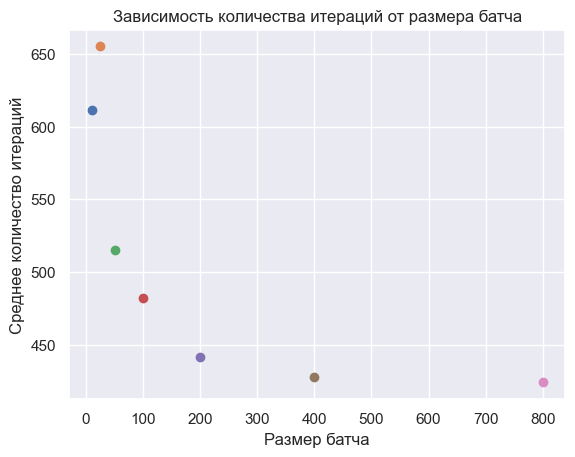

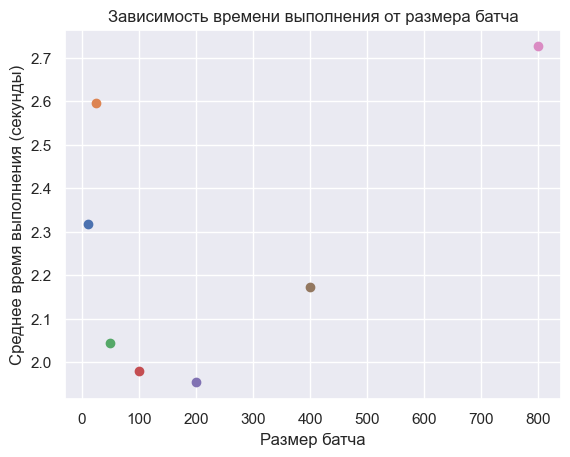

In [47]:
# YOUR CODE
#Количество проходов
k = 10
#Размер батча

batch_mas = np.array([10, 25, 50, 100, 200, 400, 800])

#Строим графики, проходим по размеру батча
for b_value in batch_mas:
    #Массив для записи количества итераций
    iter_count = np.array([])
    #Массив для записи времени
    execution_time = np.array([])
    for _ in range(k):
        #Создаем модели
        lambda_class = partial(TimeDecayLR, lambda_=0.1)
        model = LinearRegression(optimizer = StochasticGradientDescent(lambda_class, batch_size=b_value))
        #Засекаем начальное время
        start_time = time.time()
        model.fit(X_train, y_train)
        #Засекаем конечное время
        end_time = time.time()
        #Записываем значения
        iter_count = np.append(iter_count, model.optimizer.iteration)
        execution_time = np.append(execution_time, end_time - start_time)
    #Усредняем значения и ставим точку на графике    
    mean_iter = np.mean(iter_count)
    mean_time = np.mean(execution_time)
    plt.figure(1)
    plt.scatter(b_value, mean_iter)
    plt.figure(2)
    plt.scatter(b_value, mean_time)   


plt.figure(1)
plt.xlabel('Размер батча')
plt.ylabel('Среднее количество итераций')
plt.title('Зависимость количества итераций от размера батча')
plt.savefig('графики9.pdf', format='pdf')

plt.figure(2)
plt.xlabel('Размер батча')
plt.ylabel('Среднее время выполнения (секунды)')
plt.title('Зависимость времени выполнения от размера батча')
plt.savefig('графики10.pdf', format='pdf')

plt.show()

**Выводы:**

При увеличении размера батча среднее количество итераций падает по гиперболе. Это связано с тем, что градиент становится менее шумным и более точным.

Зависимость времени схождения от размера батча похожа на гиперболу с вытянутой правой ветвью. Это связано с тем, что градиенты маленьких батчей помещаются в кэш и чем больше батч, тем быстрее происходит схождение. Но при увеличении размера батча градиент уже не помещается в кэш и приходится обращаться к медленной памяти, поэтому время выполнения растет.

## Задание 7. Регуляризация (0.5 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация – это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать $L_2$-регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 5 графиков).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [48]:
# YOUR CODE
descent_models = [
    VanillaGradientDescent,
    StochasticGradientDescent,
    SAGDescent,
    MomentumDescent,
    Adam
]
#Диапазон значений
lambda_mas = np.logspace(-3, 0, 4)
mu_mas = np.logspace(-2, 1, 4)
data = []

for descent_model in descent_models:
    model_name = descent_model.__name__
    #Проходимся по каждой лямбде
    for lambda_ in lambda_mas:
        #Проходимся по каждой мю
        for mu_ in mu_mas:
            #Задаем модель
            lambda_class = partial(TimeDecayLR, lambda_=lambda_)
            model = LinearRegression(optimizer=descent_model(lambda_class), l2_coef=mu_)
            model.fit(X_train, y_train)
            #Вставляем в дату
            data.append({
                'model': model_name,
                'lambda': lambda_,
                'mu': mu_,
                'iterations': model.optimizer.iteration,
                'mse_train': mse(model.predict(X_train), y_train),
                'mse_val': mse(model.predict(X_val), y_val),
                'r2_train': r2_score(model.predict(X_train), y_train),
                'r2_val': r2_score(model.predict(X_val), y_val)
            })
#Делаем датафрейм
df_all = pd.DataFrame(data)

In [49]:
#Для каждой модели при каждой лямбда делаем таблицу с разными значениями мю
for model_name in df_all['model'].unique():
    for lambda_val in df_all['lambda'].unique():
        subset = df_all[(df_all['model'] == model_name) & (df_all['lambda'] == lambda_val)]
        table = subset[['mu', 'iterations', 'mse_train', 'mse_val', 'r2_train', 'r2_val']].round(4)
        table = table.reset_index(drop=True)
        
        print(f"Модель: {model_name}, Lambda: {lambda_val}")
        print(table)
        print("\n")

Модель: VanillaGradientDescent, Lambda: 0.001
      mu  iterations  mse_train  mse_val   r2_train     r2_val
0   0.01         521    38.0443  38.0370  -687.5374  -695.9153
1   0.10         518    38.1614  38.1541  -695.7265  -704.1989
2   1.00         489    39.2984  39.2917  -781.1654  -790.6185
3  10.00         313    47.0689  47.0671 -1835.8881 -1857.1540


Модель: VanillaGradientDescent, Lambda: 0.01
      mu  iterations  mse_train  mse_val  r2_train    r2_val
0   0.01         461     1.3843   1.3783   -0.8067   -0.8476
1   0.10         450     1.5048   1.4977   -1.0308   -1.0757
2   1.00         367     3.2982   3.2833   -4.9427   -5.0677
3  10.00         118    25.7435  25.7272 -209.8381 -213.3518


Модель: VanillaGradientDescent, Lambda: 0.1
      mu  iterations  mse_train  mse_val  r2_train    r2_val
0   0.01         427     0.3535   0.3540    0.6737    0.6681
1   0.10         318     0.4421   0.4393    0.5815    0.5762
2   1.00          79     1.9218   1.9039   -1.5880   -1.63

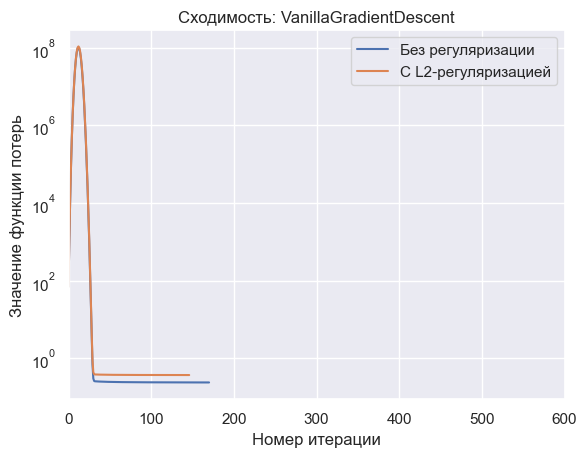

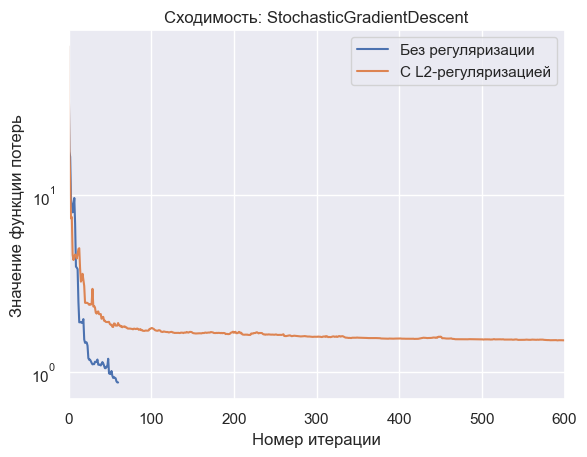

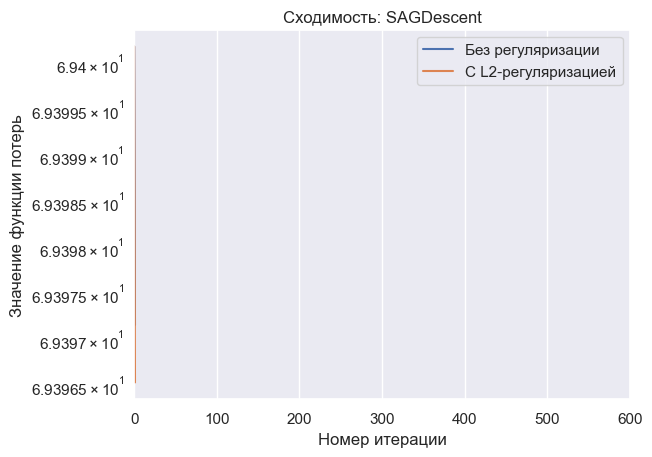

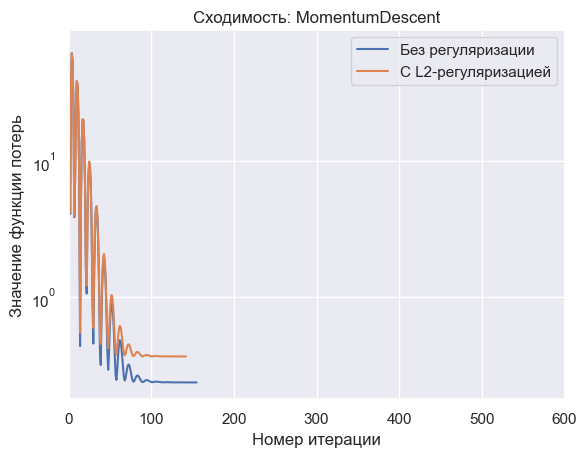

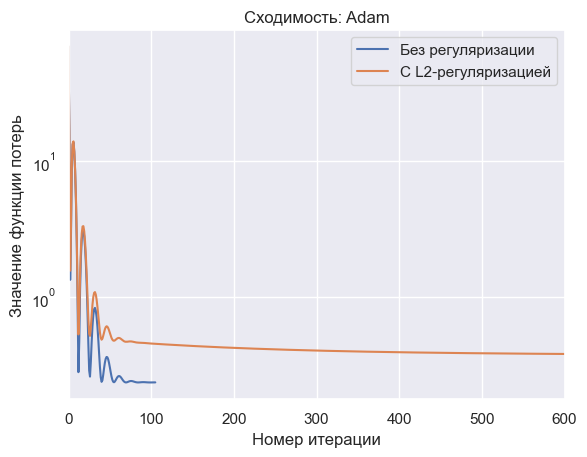

In [50]:
descent_models = [
    VanillaGradientDescent,
    StochasticGradientDescent,
    SAGDescent,
    MomentumDescent,
    Adam
]

#Строим графики ошибки на тренировочной выборке при оптимальном мю и лямбда
lambda_opt = [1, 0.1, 1, 0.1, 1]
mu_opt = [0.01, 0.1, 10, 0.01, 0.01]
i = 0

for descent_model in descent_models:
    lambda_class = partial(TimeDecayLR, lambda_=lambda_opt[i])
    model = LinearRegression(optimizer = descent_model(lambda_class))
    model.fit(X_train, y_train)
    loss_h = model.loss_history
    model2 = LinearRegression(optimizer = descent_model(lambda_class), l2_coef=mu_opt[i])
    model2.fit(X_train, y_train)
    loss_h2 = model2.loss_history
    
    plt.figure(i + 1)
    plt.plot(loss_h, label='Без регуляризации')
    plt.plot(loss_h2, label='С L2-регуляризацией')
    plt.xlabel('Номер итерации')
    plt.ylabel('Значение функции потерь')
    plt.title(f'Сходимость: {descent_model.__name__}')
    plt.savefig(f'графики{11 + i}.pdf', format='pdf')
    i += 1

    plt.xlim(0, 600)
    plt.yscale('log')
    plt.legend()

**Вывод:**

Из графиков видно, что с L2-регуляризацией ошибка на тренировочной выборке больше, чем без регуляризации. Это связано с тем, что L2-регуляризация не дает нам слишком сильно подстраиваться под тренировочные данные, чтобы не вызвать переобучения. 

Если сравнивать таблицы видно:

* У VanillaGradientDescent при L2 регуляризации уменьшилась ошибка MSE на валидационной выборке, метрика $R^2$ осталась такого же порядка.

* У StochasticGradientDescent выросла $R^2$ на валидационной выборке и увеличилась MSE, что связано с тем, что модель хуже подстроилась под тренировочные данные

* У SAGDescent  все также нет сходимости, но произошло уменьшение порядка в ошибке и $R^2$

* MomentumDescent и Adam изменились незначительно по ошибке и $R^2$. Что говорит о том, что у них и так достаточно хорошая устойчивость и сходимость из-за их подбора шагов

Рост $R^2$ в оптимизаторах говорит о том, что модели стали лучше обобщать данные

## Задание 8. Альтернативные функции потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **LogCosh** и **HuberLoss**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

$$
L_{\text{Huber}}(y, a) = \frac{1}{n} \sum_{i=1}^{n}
\begin{cases}
   \frac{1}{2} (a_i - y_i)^2, & \text{если } |a_i - y_i| < \delta, \\
   \delta \cdot |a_i - y_i| - \frac{1}{2} \delta^2, & \text{если } |a_i - y_i| \geq \delta,
\end{cases}
$$

Самостоятельно продифференцируйте данные функции потерь чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

**Решение:**

**1. Функция потерь $L(y, a) = \log(\cosh(a - y))$**

Берем производную по цепочке
$$\frac{\partial L}{\partial a} = \frac{1}{\cosh(a - y)} \cdot \sinh(a - y) * 1=\tanh(a - y)$$

**Ответ**
$$\nabla{L} = \tanh(a - y)$$

**2. Функция потерь Хьюбера**

Посчитаем для одного элемента

**Случай $|a_i - y_i| < \delta$**

Берем производную от $L_i = \frac{1}{2} (a_i - y_i)^2 $

$$\frac{\partial L_i}{\partial a_i} = a_i - y_i$$

**Случай $|a_i - y_i| \geq \delta$**

Берем производную от $L_i = \delta \cdot |a_i - y_i| - \frac{1}{2} \delta^2$

Если $a_i - y_i \geq \delta $, тогда $\frac{\partial L_i}{\partial a_i} = \delta$

Если $a_i - y_i \leq -\delta$, тогда $\frac{\partial L_i}{\partial a_i} = -\delta$

**Ответ**
$$\nabla{L}= 
\begin{cases}
a - y, & \text{если } |a - y| < \delta \\
\delta \cdot \operatorname{sign}(a - y), & \text{если } |a - y| \geq \delta
\end{cases}$$

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все пять методов (без регуляризации) аналогично 5 заданию, сравните их качество с пятью методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class LinearRegression:
    def __init__(
        self,
        optimizer: BaseDescent,
        l2_coef: float = 0.0,
        tolerance: float = 1e-6,
        max_iter: int = 1000,
        loss_function: LossFunction = LossFunction.MSE
    ):
        ...
    
    def compute_gradients(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            # YOUR CODE FOR MSE
        if self.loss_function is LossFunction.MAE:
            # YOUR CODE FOR MAE
        ...
    
    def compute_loss(self, X: np.ndarray, y: np.ndarray) -> float:
        if self.loss_function is LossFunction.MSE:
            # YOUR CODE FOR MSE
        if self.loss_function is LossFunction.MAE:
            # YOUR CODE FOR MAE
        ...
...

```

In [51]:
from linear_regression import LossFunction

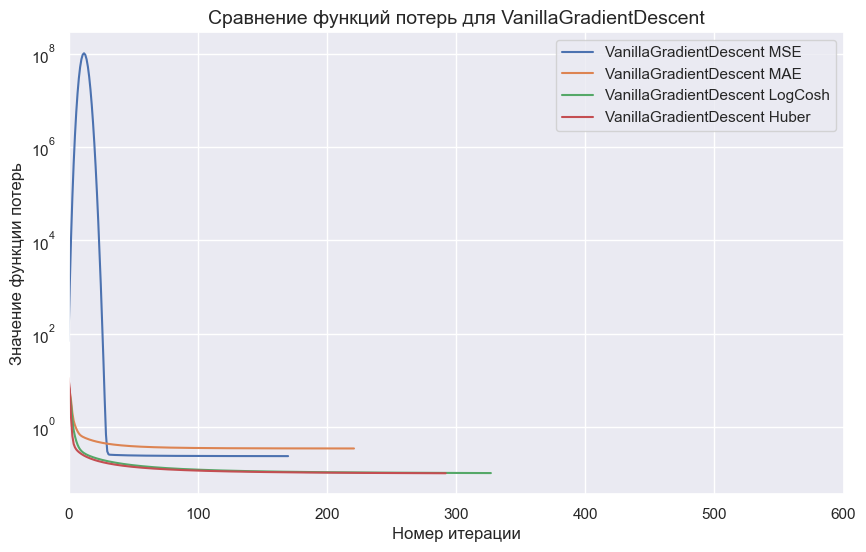

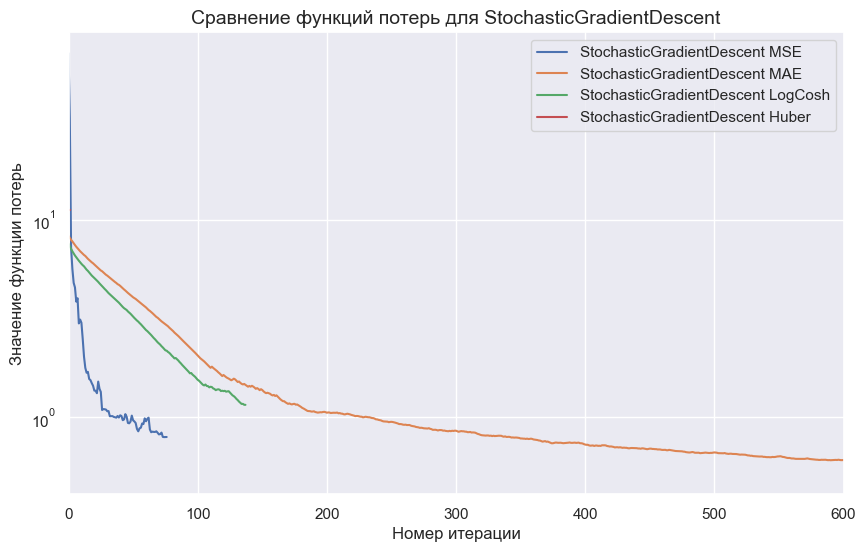

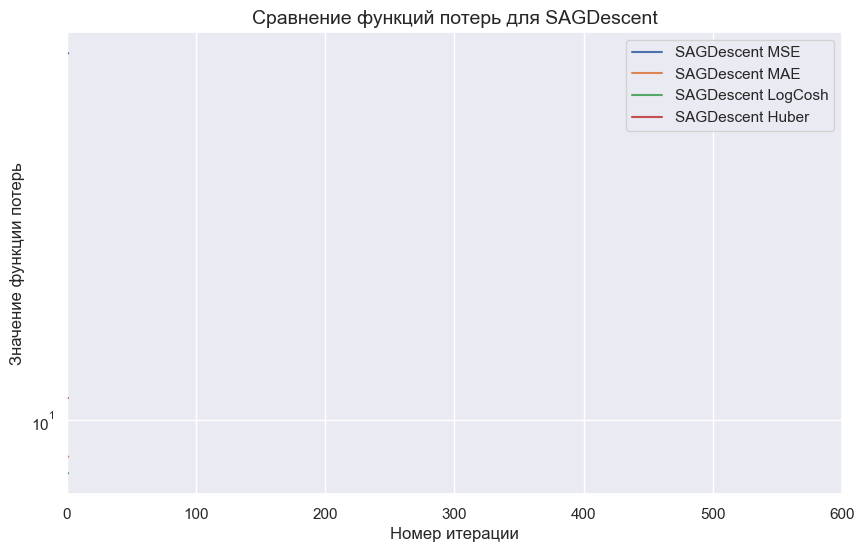

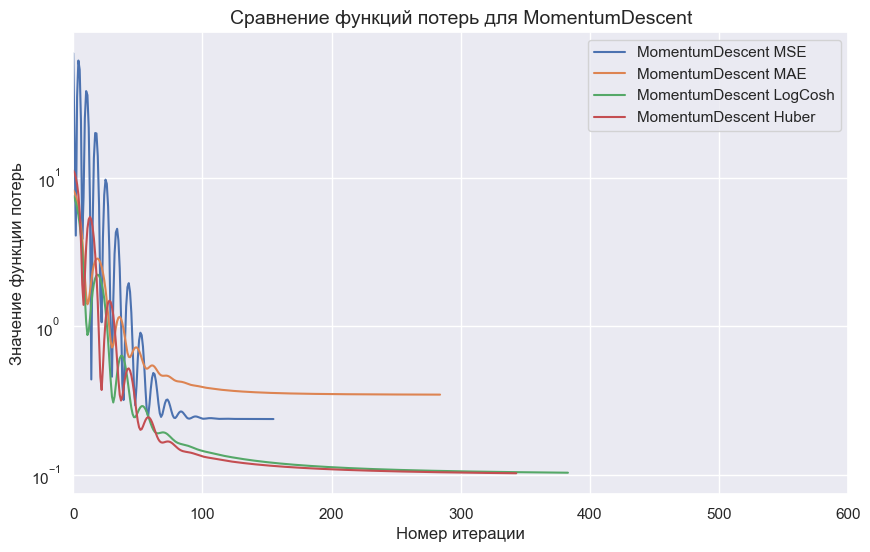

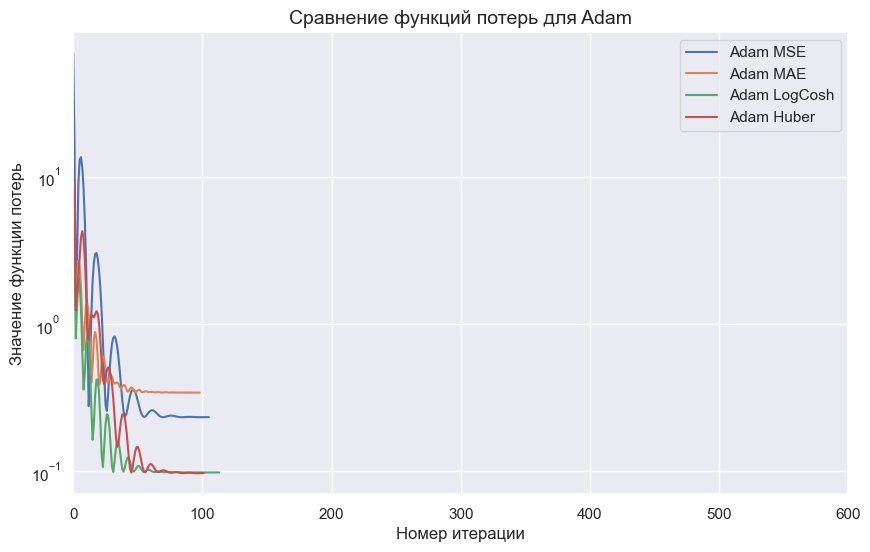

In [52]:
#На тренировочной выборке строим графики новых ошибок при оптимальных лямбда

descent_models = [
    VanillaGradientDescent,
    StochasticGradientDescent,
    SAGDescent,
    MomentumDescent,
    Adam
]

lambda_opt = [1, 0.1, 1, 0.1, 1]
i = 0

for descent_model in descent_models:
    lambda_class = partial(TimeDecayLR, lambda_=lambda_opt[i])
    model = LinearRegression(optimizer = descent_model(lambda_class))
    model.fit(X_train, y_train)
    loss_h = model.loss_history

    model2 = LinearRegression(optimizer = descent_model(lambda_class), loss_function=LossFunction.MAE)
    model2.fit(X_train, y_train)
    loss_h2 = model2.loss_history

    model3 = LinearRegression(optimizer = descent_model(lambda_class), loss_function=LossFunction.LogCosh)
    model3.fit(X_train, y_train)
    loss_h3 = model3.loss_history

    model4 = LinearRegression(optimizer = descent_model(lambda_class), loss_function=LossFunction.Huber)
    model4.fit(X_train, y_train)
    loss_h4 = model4.loss_history

    plt.figure(i + 1, figsize=(10, 6))
    plt.plot(loss_h, label=f'{descent_model.__name__} MSE')
    plt.plot(loss_h2, label=f'{descent_model.__name__} MAE')
    plt.plot(loss_h3, label=f'{descent_model.__name__} LogCosh')
    plt.plot(loss_h4, label=f'{descent_model.__name__} Huber')

    plt.xlabel('Номер итерации', fontsize=12)
    plt.ylabel('Значение функции потерь', fontsize=12)
    plt.title(f'Сравнение функций потерь для {descent_model.__name__}', fontsize=14)
    
    i += 1

    plt.legend()
    plt.xlim(0, 600)
    plt.yscale('log')
    plt.show()

### Кулинарно-социализационный бонус. (0.5 балла)

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

### Бонус Бонусный со звездочкой. Рефакторинг LinearRegression с соблюдением OCP (0.5 балла)

Этот бонус для тех, у кого нет друзей и кулинарных способностей.

Цель - провести рефакторинг класса `LinearRegression`, руководствуясь принципом **Open-Closed Principle** (OCP). Напомним его суть: программные сущности (классы, модули, функции) должны быть открыты для расширения, но закрыты для модификации. В нашем контексте это означает, что добавление новой функции потерь или нового типа регуляризации не должно требовать внесения изменений в уже существующий код модели `LinearRegression` или оптимизаторов.

Вам предоставляется свобода в выборе конкретной реализации (например, через `Strategy`/`Protocol`/интерфейсы), однако итоговое решение должно удовлетворять перечисленным ниже требованиям.

**Требования к реализации**

**1. Совместимость с существующим кодом (жёсткие требования):**

* Публичный API класса `LinearRegression` должен остаться неизменным, чтобы не нарушать работу автоматических тестов.
* Аргумент конструктора `loss_function: LossFunction = LossFunction.MSE` и сам `Enum` `LossFunction` сохраняются.
* Имена/сигнатуры ключевых методов (`predict`, `compute_gradients`, `compute_loss`, `fit`) и полей (`w`, `loss_history`) должны остаться прежними.
* Должно работать динамическое переключение лосса через enum: присваивание
`model.loss_function = LossFunction.Huber` меняет поведение `compute_loss/compute_gradients` без пересоздания модели.
* Код оптимизаторов из `descents.py` не меняется и по-прежнему вызывает только `self.model.compute_gradients(...)`.

**2. Расширяемость архитектуры:**

* Необходимо реализовать возможность инъекции кастомной стратегии для функции потерь (например, через новый необязательный аргумент в конструкторе `loss=...`). При передаче такой стратегии она должна использоваться вместо той, что выбирается через `Enum`.
* Добавьте поддержку L2-регуляризации. Её реализация и способ интеграции остаются на ваше усмотрение. Решение о штрафовании свободного члена (`bias`) примите самостоятельно и кратко опишите в ноутбуке.


Для зачёта задания предоставьте в конце ноутбука отдельный раздел, в котором содержатся:

* Короткое описание (2–5 предложений), как решение следует OCP.
* Две мини-демонстрации:
    1.  Создание модели с `loss_function=LogCosh`, вызов `compute_loss`, последующее присваивание `model.loss_function = LossFunction.MSE` и повторный вызов `compute_loss`, показывающий, что поведение модели изменилось.
    2.  Создание модели с передачей вашей кастомной стратегии в конструктор и демонстрация того, что она корректно работает со стандартным оптимизатором (например, `Adam`).
* Подтверждение, что базовый сценарий (только `enum`, без кастомных стратегий) проходит ваши локальные проверки.